In [7]:
from genesis4 import readers, writers
from pmd_wavefront.interfaces.genesis4 import write_dfl_to_genesis4_field
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib
import scipy

In [8]:
c = scipy.constants.speed_of_light
fs = 1e15

In [9]:
with h5py.File('field_two_color.h5', 'r') as h5:
    DFL, PARAM = readers.load_genesis4_fields(h5)

In [10]:
DFL.shape, DFL.dtype, PARAM

((301, 301, 1512),
 dtype('complex128'),
 {'gridpoints': 301,
  'gridsize': 1.3333333333333333e-05,
  'refposition': 0.0,
  'wavelength': 4e-09,
  'slicecount': 1512,
  'slicespacing': 2e-08})

In [11]:
DFL_new = DFL.copy()

In [12]:
att = 0.8 + 1j * 0.0
tmax = PARAM['slicespacing'] / c * PARAM['slicecount']
t_th = np.linspace(-tmax/2.0, tmax/2.0, PARAM['slicecount'])

In [13]:
for i in range(0, PARAM['gridpoints']):
    for j in range(0, PARAM['gridpoints']):
        DFL_new[i,j,:] *= att

In [14]:
write_dfl_to_genesis4_field('field_att.h5', DFL_new, **PARAM)

In [15]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['xtick.labelsize'] = 22
matplotlib.rcParams['ytick.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 22

Text(0, 0.5, '|E| (arb)')

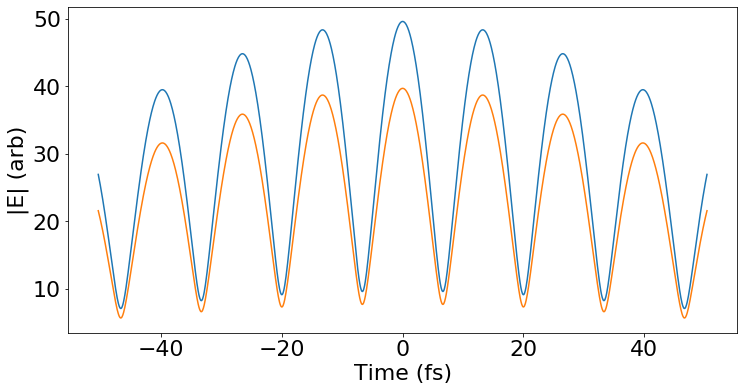

In [19]:
plt.plot(t_th*fs,np.abs(DFL[int(PARAM['gridpoints']/2), int(PARAM['gridpoints']/2), :]),'-')
plt.plot(t_th*fs,  np.abs(DFL_new[int(PARAM['gridpoints']/2), int(PARAM['gridpoints']/2), :]),'-')
plt.xlabel('Time (fs)')
plt.ylabel(r'|E| (arb)')